# Project workflow.
- The project is a machine learning project that aims to predict the amount of money paid as premiums for an insuarnace company.
- This is a supervised regression task.

1. Import the necessary libraries.
2. Problem definition and desired outcome.
3. Data collection (Use the available dataset)
4. Data cleaning and preprocessing.
5. EDA analysis.
6. Feature engineering and feature selection.
7. ML model selection.
8. Model training.
9. Model evaluation and deployment.

In [2]:
# Imported all the needed libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import joblib

In [3]:
df=pd.read_csv("Health_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Datacleaning and processing.

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()   


1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dtypes
# Data is of the right type, no need to change anything.

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


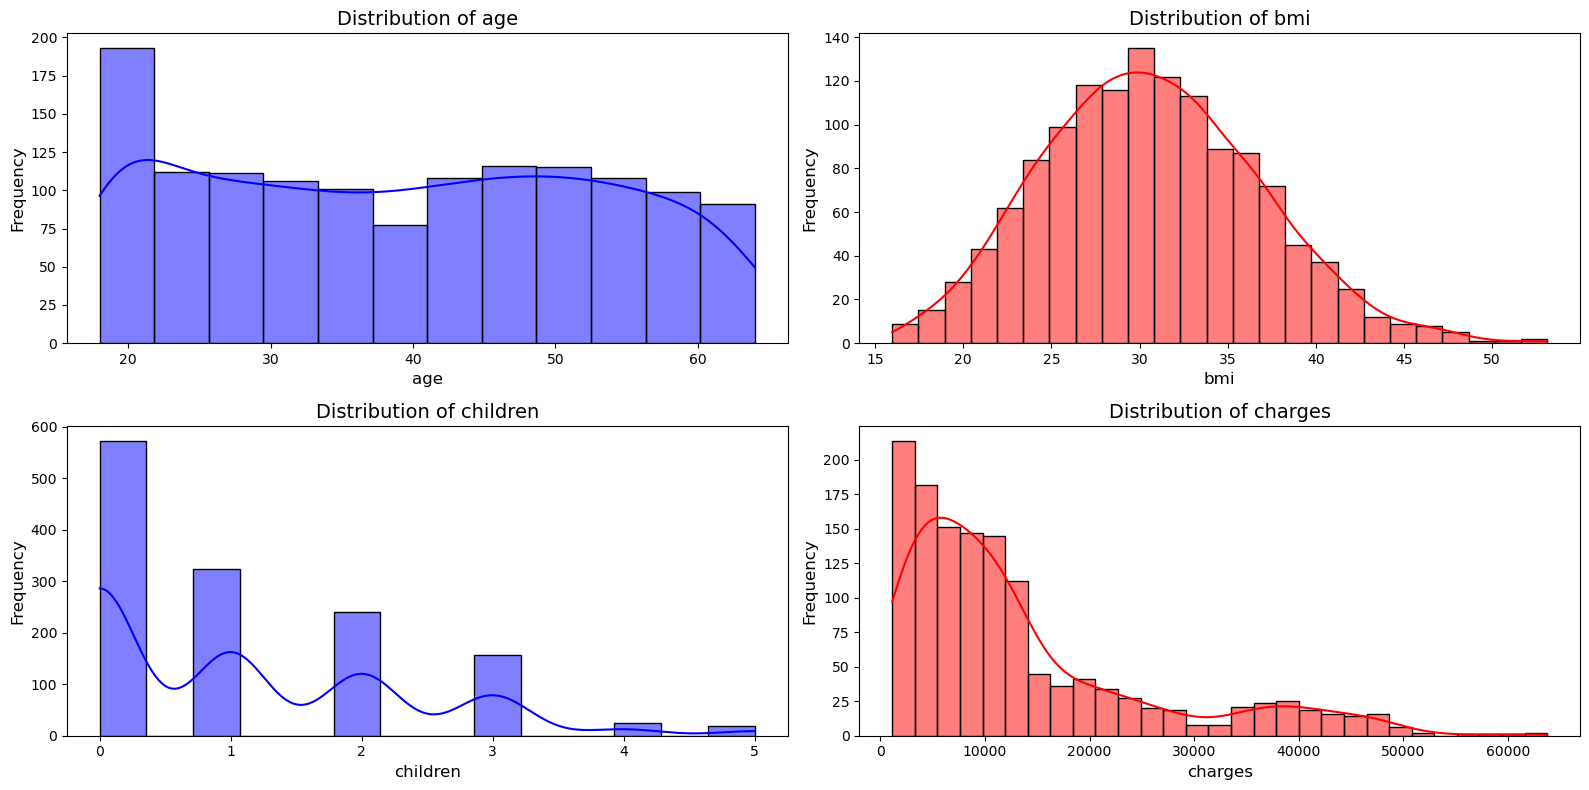

In [10]:

plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

columns = [("age", "blue"), ("bmi", "red"), ("children", "blue"), ("charges", "red")]

for i, (col, color) in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(data=df, x=col, kde=True, color=color)
    plt.title(f"Distribution of {col}", fontsize=14)  
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

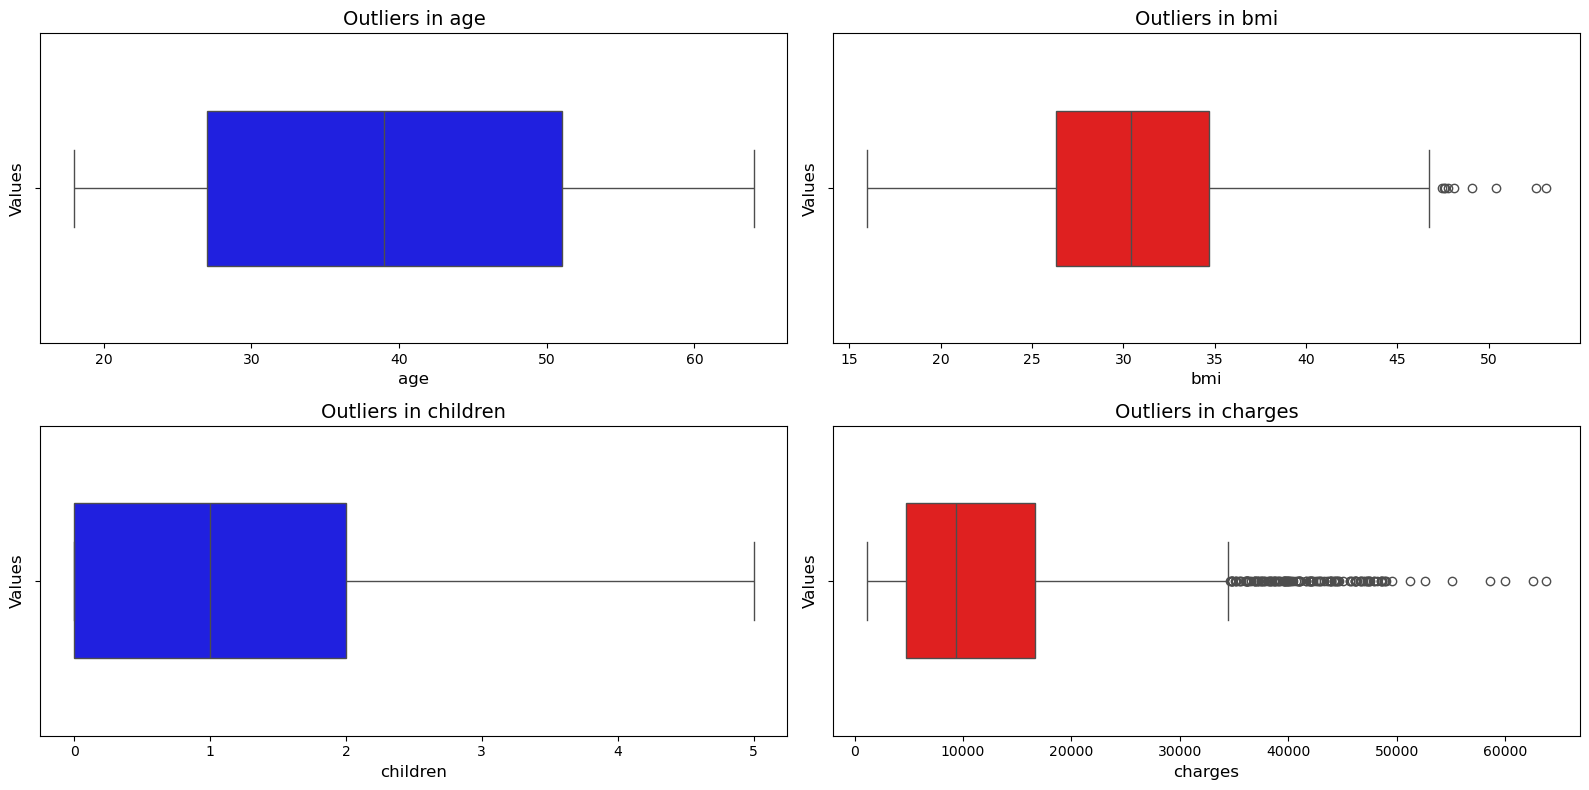

In [11]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

columns = [("age", "blue"), ("bmi", "red"), ("children", "blue"), ("charges", "red")]

for i, (col, color) in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=df, x=col, color=color, width=0.5)  
    plt.title(f"Outliers in {col}", fontsize=14)
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Values", fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
Q1=df["charges"].quantile(0.25)
Q3=df["charges"].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_charges=df[(df["charges"]<lower_bound) | (df["charges"]>upper_bound)]
outliers_charges.head(10)


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
38,35,male,36.67,1,yes,northeast,39774.27630
39,60,male,39.90,0,yes,southwest,48173.36100
49,36,male,35.20,1,yes,southeast,38709.17600
53,36,male,34.43,0,yes,southeast,37742.57570


- I will work with the outliers as some such as a high BMI might indicate obesity situation.
- The outliers in charges indicate that smokers and older people tend to pay much more and this condition cannot be treated as an outlier.

# Data visualization to get indepth analysis.

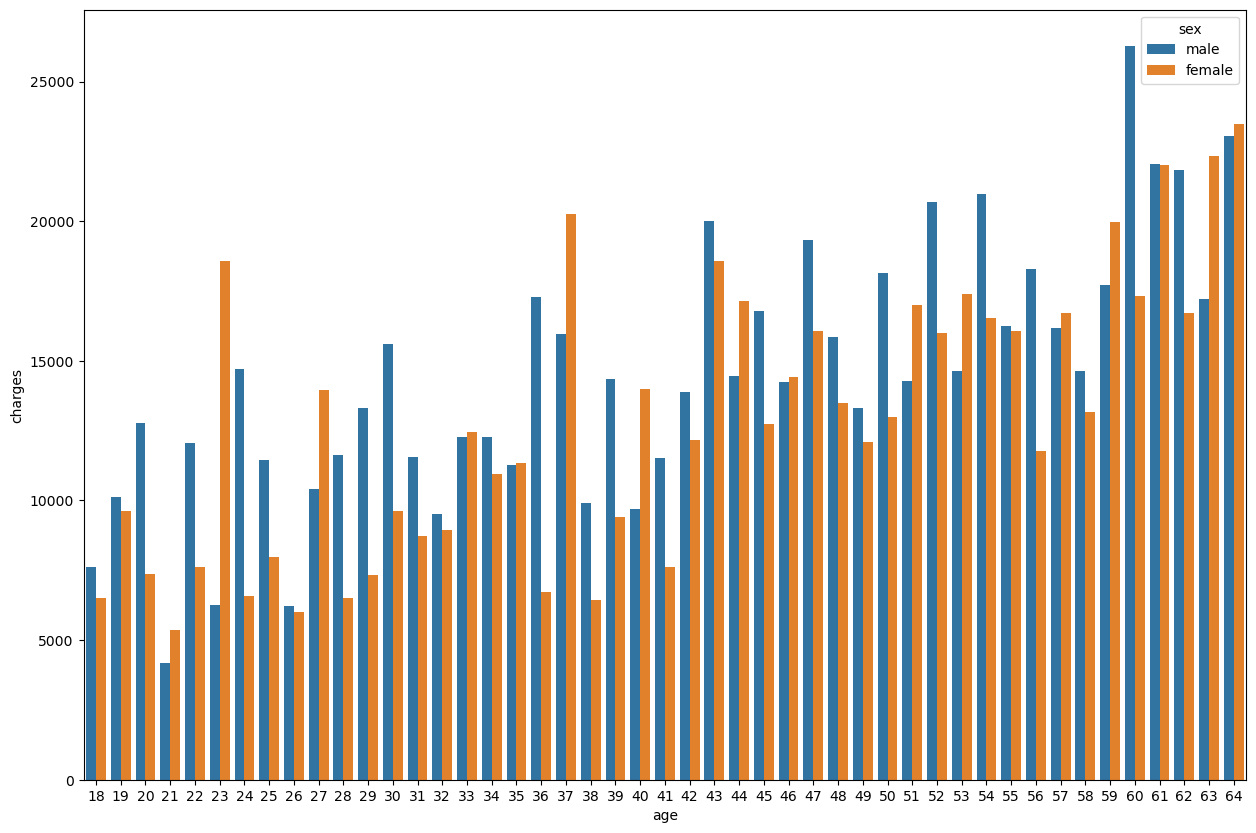

In [13]:
age=df.groupby(["age","sex"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x="age",y="charges",data=age,hue="sex")
plt.show()

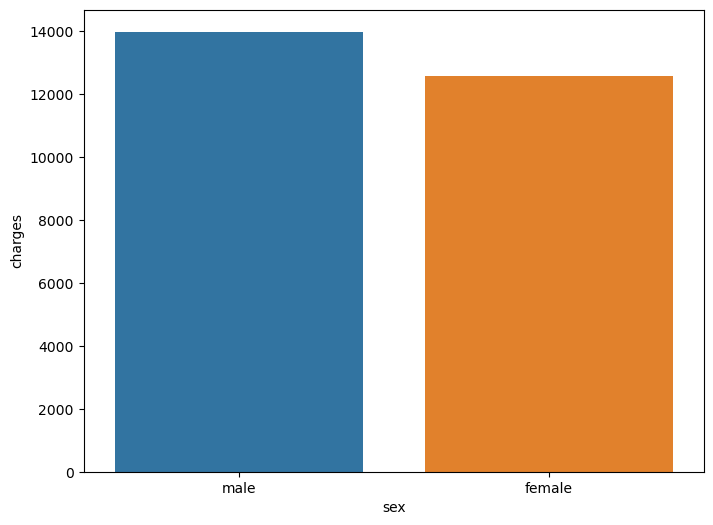

In [14]:
sex=df.groupby("sex")["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="sex",y="charges",data=sex,hue="sex")
plt.show()

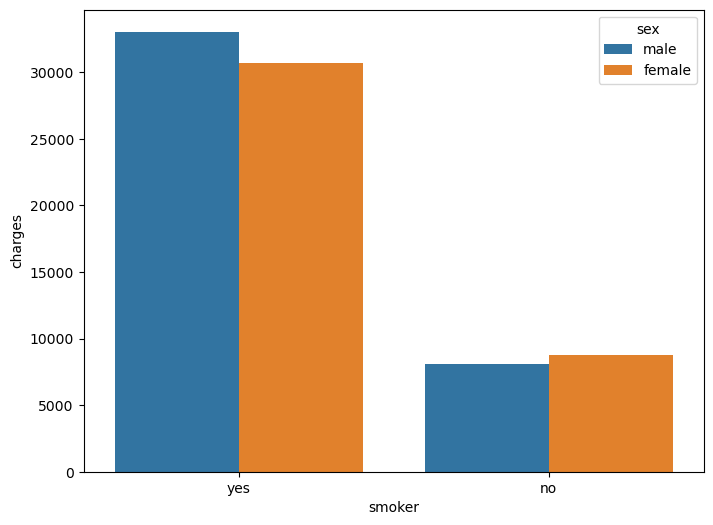

In [15]:
smoker=df.groupby(["smoker","sex"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="smoker",y="charges",data=smoker,hue="sex")
plt.show()

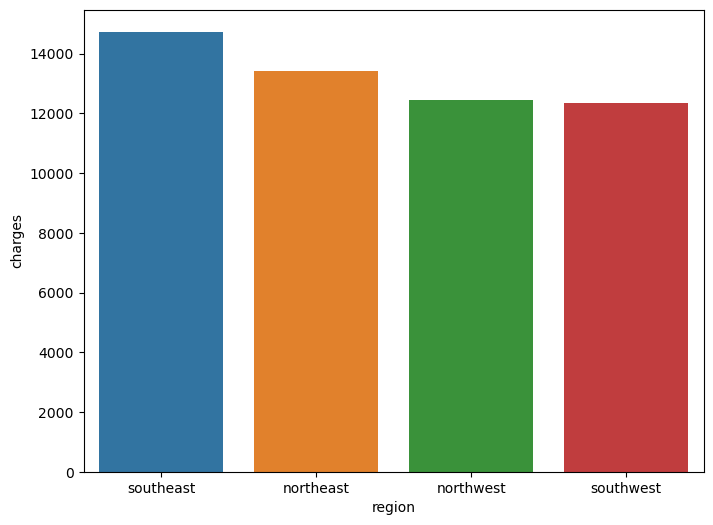

In [16]:
smoker=df.groupby(["region"])["charges"].mean().reset_index().sort_values(by="charges",ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="region",y="charges",data=smoker,hue="region")
plt.show()

# Encoding the features

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
#Encoding categorical variables to continious variable.
df["sex"]=df["sex"].map({"female":0,"male":1})
df["smoker"]=df["smoker"].map({"no":0,"yes":1})
df["region"]=df["region"].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


No further feature engineering can be done and I will jump to the machine modelling.

# Machine Learning process.

In [20]:
# Splitting the data into dependent and independent variables.
X=df.drop(["charges"],axis=1)
y=df["charges"]

In [21]:
# Performing feature selection using VarianceThreshold

corr_matrix = X.corr()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Finding features with correlation greater than a threshold (e.g., 0.9)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X_selected = X.drop(high_corr_features, axis=1)

print("Removed features due to high correlation:")
print(high_corr_features)

Removed features due to high correlation:
[]


<Axes: >

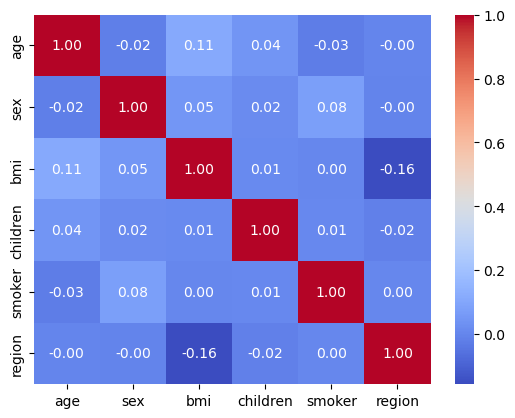

In [22]:
sns.heatmap(X_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# Features are not highly correlated, so no need to drop any features.

- All the features meet the variance threshold so I will use all features

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MAE training data($):4181.32
MAE on test data($):4182.35
R^2 training data: 0.73
R^2 on test data: 0.81
Cross validation results(LR) [0.80684663 0.71456334 0.75125418 0.67483847 0.74825753]
Mean cross validation: 0.7391520293888119


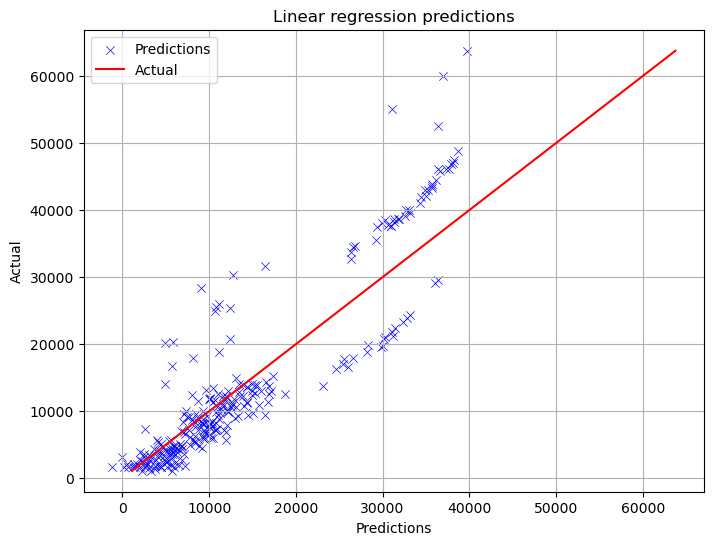

In [38]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)

# Make predictions on the training and test data
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# # Calculate the mean absoulte and R2 for the training and test data
print(f"MAE training data($):{mean_absolute_error(y_train, y_train_pred).round(2)}")
print(f"MAE on test data($):{mean_absolute_error(y_test, y_test_pred).round(2)}")

print(f"R^2 training data: {r2_score(y_train, y_train_pred).round(2)}")
print(f"R^2 on test data: {r2_score(y_test, y_test_pred).round(2)}")

folds = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val = cross_val_score(lr, X,y,cv=folds)
print(f"Cross validation results(LR)",cross_val)
print(f"Mean cross validation:",cross_val.mean())

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred,y=y_test,marker="x",label="Predictions",color="blue")
sns.lineplot(x=y_test,y=y_test,label="Actual",color="red")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Linear regression predictions")
plt.grid()
plt.legend()
plt.show()

MAE training data($):4181.32
MAE on test data($):4182.35
R^2 training data: 0.73
R^2 on test data: 0.81
Cross validation results(dtree) [0.76854194 0.66863459 0.63453518 0.6758929  0.74395526]
Mean cross validation: 0.6983119735973862


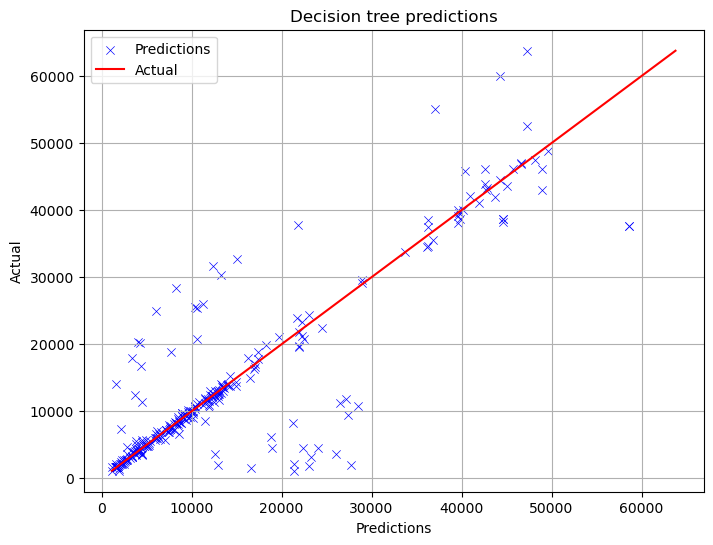

In [40]:
dtree=DecisionTreeRegressor(random_state=42)
dtree.fit(X_train_scaled,y_train)
y_pred=dtree.predict(X_test_scaled)

# # Calculate the mean absoulte and R2 for the training and test data
print(f"MAE training data($):{mean_absolute_error(y_train, y_train_pred).round(2)}")
print(f"MAE on test data($):{mean_absolute_error(y_test, y_test_pred).round(2)}")

print(f"R^2 training data: {r2_score(y_train, y_train_pred).round(2)}")
print(f"R^2 on test data: {r2_score(y_test, y_test_pred).round(2)}")

folds = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val = cross_val_score(dtree, X,y,cv=folds)
print(f"Cross validation results(dtree)",cross_val)
print(f"Mean cross validation:",cross_val.mean())


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred,y=y_test,marker="x",label="Predictions",color="blue")
sns.lineplot(x=y_test,y=y_test,label="Actual",color="red")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Decision tree predictions")
plt.grid()
plt.legend()
plt.show()



MAE training data($):4181.32
MAE on test data($):4182.35
R^2 training data: 0.73
R^2 on test data: 0.81
Cross validation results(rforest) [0.88053842 0.80359486 0.81264531 0.82362944 0.8407928 ]
Mean cross validation: 0.8322401643300921


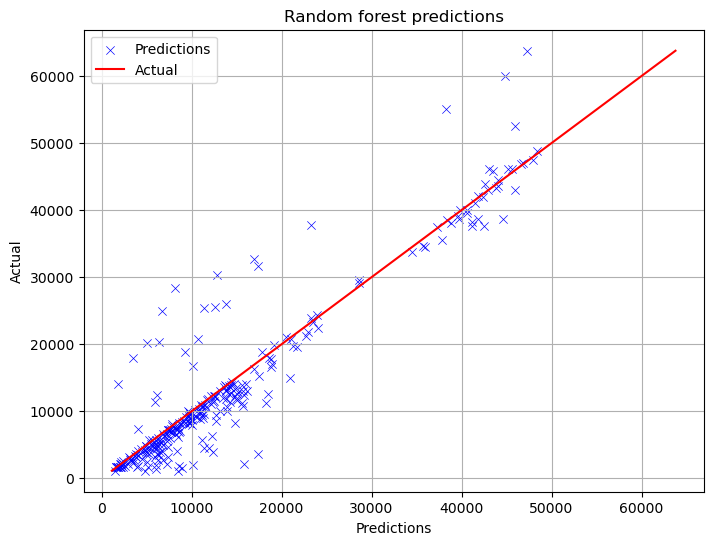

In [41]:
rforest=RandomForestRegressor(random_state=42)
rforest.fit(X_train_scaled,y_train)
y_pred=rforest.predict(X_test_scaled)

# Calculate the mean absoulte and R2 for the training and test data
print(f"MAE training data($):{mean_absolute_error(y_train, y_train_pred).round(2)}")
print(f"MAE on test data($):{mean_absolute_error(y_test, y_test_pred).round(2)}")

print(f"R^2 training data: {r2_score(y_train, y_train_pred).round(2)}")
print(f"R^2 on test data: {r2_score(y_test, y_test_pred).round(2)}")

folds = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val = cross_val_score(rforest, X,y,cv=folds)
print(f"Cross validation results(rforest)",cross_val)
print(f"Mean cross validation:",cross_val.mean())

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred,y=y_test,marker="x",label="Predictions",color="blue")
sns.lineplot(x=y_test,y=y_test,label="Actual",color="red")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Random forest predictions")
plt.grid()
plt.legend()
plt.show()



- Model seems to be underfitting due to oversimplistic models.
- I will use a boosting algorithim such as gradient boosting to combine weak base models.

MAE training data($):4181.32
MAE on test data($):4182.35
R^2 training data: 0.73
R^2 on test data: 0.81
Cross validation results(xgboost) [0.90124742 0.81676173 0.84318818 0.84331496 0.86011294]
Mean cross validation: 0.8529250455048258


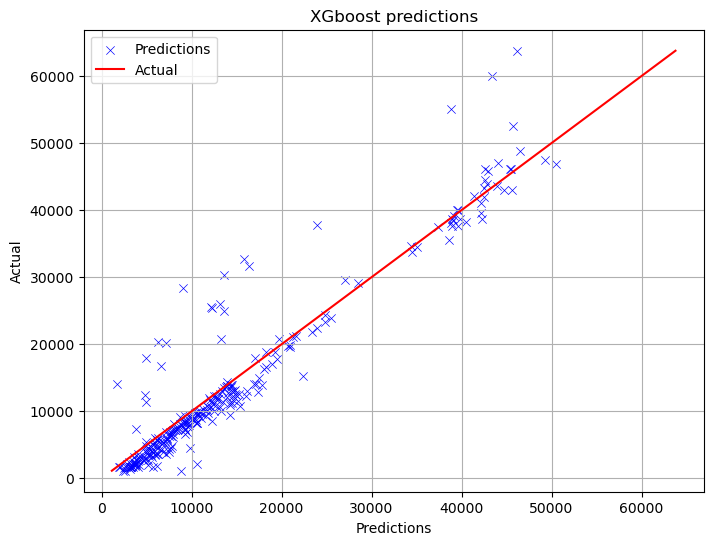

In [44]:
xgboost=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,max_depth=3,random_state=42)
xgboost.fit(X_train_scaled,y_train)
y_pred=xgboost.predict(X_test_scaled)


# Calculate the mean absoulte and R2 for the training and test data
print(f"MAE training data($):{mean_absolute_error(y_train, y_train_pred).round(2)}")
print(f"MAE on test data($):{mean_absolute_error(y_test, y_test_pred).round(2)}")

print(f"R^2 training data: {r2_score(y_train, y_train_pred).round(2)}")
print(f"R^2 on test data: {r2_score(y_test, y_test_pred).round(2)}")

folds = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val = cross_val_score(xgboost, X,y,cv=folds)
print(f"Cross validation results(xgboost)",cross_val)
print(f"Mean cross validation:",cross_val.mean())

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred,y=y_test,marker="x",label="Predictions",color="blue")
sns.lineplot(x=y_test,y=y_test,label="Actual",color="red")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("XGboost predictions")
plt.grid()
plt.legend()
plt.show()



In [45]:
param_dist={
    "n_estimators":[100,200,300],
     "learning_rate":[0.01,0.1,0.2],
     "max_depth":[3,4,5]
}

estimator=GradientBoostingRegressor(random_state=42)

grid=GridSearchCV(estimator=estimator,param_grid=param_dist,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)

grid.fit(X_train_scaled,y_train)

best_params=grid.best_params_
best_estimator=grid.best_estimator_
best_score=grid.best_score_

In [30]:
best_params

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}

In [31]:
best_estimator

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=300,
                          random_state=42)

In [32]:
best_model=GradientBoostingRegressor(learning_rate=0.01,n_estimators=300,random_state=42)
best_model.fit(X_train_scaled,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [46]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)

cross_val = cross_val_score(best_model, X,y,cv=folds)
print(f"Cross validation results(best_model)",cross_val)
print(f"Mean cross validation:",cross_val.mean())

Cross validation results(best_model) [0.89692777 0.82263962 0.84903648 0.85315149 0.85639539]
Mean cross validation: 0.8556301509745644


In [35]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

- The model performs well to new unseen data having a good prediction rate of 86%
- This shows that the model can generalize well to new unseen data to predict premiums to be paid by a customer.
